In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import statsmodels as sm

In [4]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

/root/.pyenv/versions/3.5.3/envs/hrc/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# X = [DoP, A1~A4, ASC] y = PoCE (Sheet 1, 2, 4)

In [5]:
df1 = pd.read_excel('./Regressions.xlsx', sheetname=0) # DOP VS POCE

In [6]:
df2 = pd.read_excel('./Regressions.xlsx', sheetname=1) # After-school vs Poce

In [7]:
df4 = pd.read_excel('./Regressions.xlsx', sheetname=3) # OA vs POCE

In [8]:
df1_2_4 = df4

In [9]:
df1_2_4['DoP'] = df1['DoP']

In [10]:
df1_2_4['After-School Classes'] = df2['After-School Classes']

In [11]:
df1_2_4 = sm.add_constant(df1_2_4)

## make the name of columns concise

In [12]:
rename_dict = {'After-School Classes':'ASC', 'Academies are a necessary part of my education.':'A1', \
                'The majority of my education comes from academies or private tutoring.':'A2', \
        'I am more likely to approach my academy or private tutors than my school teachers if I encounter learning difficulties.': 'A3',\
                  'I\xa0 studied most of the middle-school material before entering middle-school.' : 'A4'}

In [13]:
df1_2_4_re = df1_2_4.rename(columns=rename_dict)

In [14]:
df1_2_4_re['A2'] = df1_2_4_re['A2'].fillna(df1_2_4_re['A2'].median())
df1_2_4_re['A3'] = df1_2_4_re['A3'].fillna(df1_2_4_re['A3'].median())
df1_2_4_re['A4'] = df1_2_4_re['A4'].fillna(df1_2_4_re['A4'].median())

In [15]:
df1_2_4_re.isnull().sum()

const    0
PoCE     0
A1       0
A2       0
A3       0
A4       0
DoP      0
ASC      0
dtype: int64

In [16]:
model_1_2_4 = sm.OLS.from_formula("PoCE ~ "
                   "scale(DoP) + scale(ASC) + scale(A1) + scale(A2) + scale(A3) + scale(A4)", data=df1_2_4_re)

In [17]:
result_1_2_4 = model_1_2_4.fit()

In [18]:
print (result_1_2_4.summary())

                            OLS Regression Results                            
Dep. Variable:                   PoCE   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     8.898
Date:                Tue, 07 Nov 2017   Prob (F-statistic):           1.02e-08
Time:                        11:45:14   Log-Likelihood:                -867.94
No. Observations:                 232   AIC:                             1750.
Df Residuals:                     225   BIC:                             1774.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.3922      0.680     81.478      0.0

In [19]:
X = df1_2_4_re.drop(axis=1, labels=["const", "PoCE"])

In [20]:
X = df1_2_4_re.drop(axis=1, labels=["const"])

/root/.pyenv/versions/3.5.3/envs/hrc/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


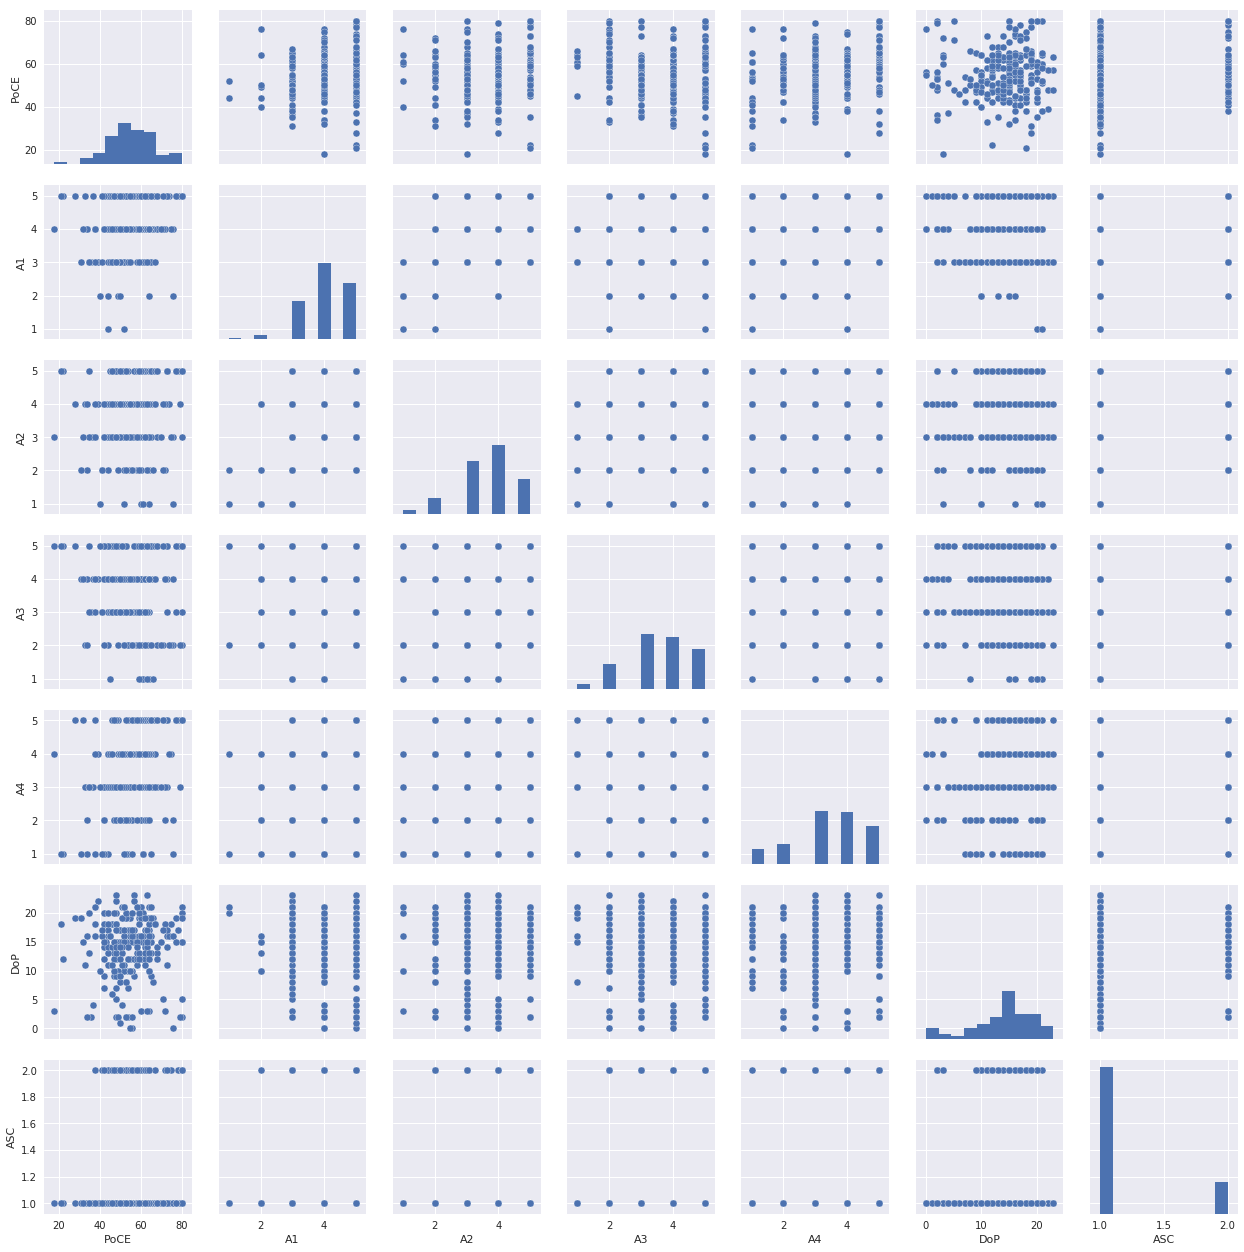

In [21]:
sns.pairplot(X)
plt.show()

/root/.pyenv/versions/3.5.3/envs/hrc/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


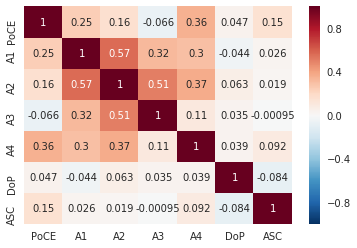

In [22]:
sns.heatmap(X.corr(), annot=True)

# Correlation between DoP and A1~A4 (Sheet 3)

In [23]:
df3 = pd.read_excel('./Regressions.xlsx', sheetname=2) # DoP vs OTHERS

In [24]:
df3_re = df3.rename(columns=rename_dict)

In [25]:
df3_re['A2'] = df3_re['A2'].fillna(df3_re['A2'].median())
df3_re['A3'] = df3_re['A3'].fillna(df3_re['A3'].median())
df3_re['A4'] = df3_re['A4'].fillna(df3_re['A4'].median())

/root/.pyenv/versions/3.5.3/envs/hrc/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


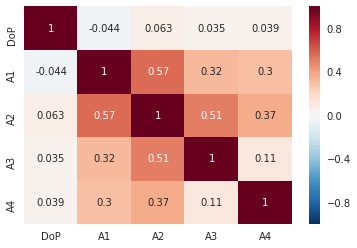

In [26]:
sns.heatmap(df3_re.corr(), annot=True)

# Correlation Between DoP and Neg (Sheet 5)

In [27]:
df5 = pd.read_excel('./Regressions.xlsx', sheetname=4) # DoP vs Neg

In [28]:
df5['Ability grouping'] = df5['Ability grouping'].fillna(df5['Ability grouping'].median())

/root/.pyenv/versions/3.5.3/envs/hrc/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


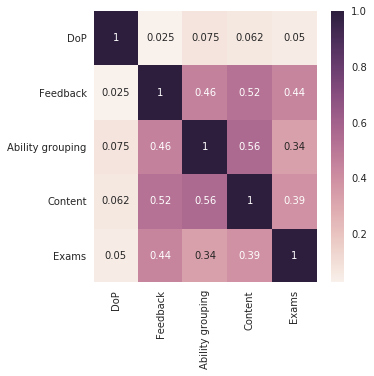

In [29]:
plt.figure(figsize = (5,5))
sns.heatmap(df5.corr(), annot=True)

# X = [DoP, PoCE] y = AA (Sheet 6)

In [30]:
df6 = pd.read_excel('./Regressions.xlsx', sheetname=5)

In [31]:
df6['AA'] = df6['AA'].fillna(df6['AA'].median())

In [32]:
df6 = sm.add_constant(df6)

In [33]:
model_6 = sm.OLS.from_formula("AA ~ "
                   "scale(DoP) + scale(PoCE)", data=df6)

In [34]:
result_6 = model_6.fit()

In [35]:
print (result_6.summary())

                            OLS Regression Results                            
Dep. Variable:                     AA   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     8.877
Date:                Tue, 07 Nov 2017   Prob (F-statistic):           0.000194
Time:                        11:45:22   Log-Likelihood:                -651.52
No. Observations:                 232   AIC:                             1309.
Df Residuals:                     229   BIC:                             1319.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      16.1078      0.265     60.753      

/root/.pyenv/versions/3.5.3/envs/hrc/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


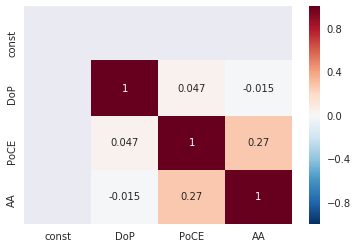

In [36]:
sns.heatmap(df6.corr(), annot=True)

# Sheet 7

In [37]:
df7 = pd.read_excel('./Regressions.xlsx', sheetname=6)

In [38]:
pd.options.display.max_columns = 100

In [39]:
df7 = df7.drop(['Unnamed: 9', 'Unnamed: 10'], axis=1)

In [40]:
df7.keys()

Index(['9 - Q13', '10 - Q9', '11 - Q10', 'English', 'Maths', 'Science',
       'Korean', 'Other', '13 - Q12',
       'My school lessons are clearly organized, and are logically ordered',
       'I clearly understand the content of all of the lessons.',
       'I know at the beginning of the lesson what I will study that day.',
       'I am regularly given feedback on how to improve in my classes.',
       'I am shown how to correct any mistakes I make in my work.',
       'I can completely understand and apply the content of each class before moving on to the next class.',
       'My classmates are of a similar ability to me in each class.',
       'The content of each class is suitable for my ability.',
       'The teachers keep an orderly and quiet atmosphere.',
       'My teachers expect me to achieve high grades in each lesson.',
       'Students are regularly questioned on the lesson content to check their understanding.',
       'My teachers have an in-depth knowledge of the subj

In [41]:
for_rename = ['My school lessons are clearly organized, and are logically ordered',
       'I clearly understand the content of all of the lessons.',
       'I know at the beginning of the lesson what I will study that day.',
       'I am regularly given feedback on how to improve in my classes.',
       'I am shown how to correct any mistakes I make in my work.',
       'I can completely understand and apply the content of each class before moving on to the next class.',
       'My classmates are of a similar ability to me in each class.',
       'The content of each class is suitable for my ability.',
       'The teachers keep an orderly and quiet atmosphere.',
       'My teachers expect me to achieve high grades in each lesson.',
       'Students are regularly questioned on the lesson content to check their understanding.',
       'My teachers have an in-depth knowledge of the subject.',
       'I have a clear incentive to learn the material.',
       'I have enough time in class and with school homework to study everything I need to for my school exams.',
       'I have enough opportunities in school to learn everything I need to for my school exams.',
       'School education is enough to pass my school exams with high marks.']

In [42]:
for_dict = [(b, 'a'+str(a+1)) for (a, b) in enumerate(for_rename)]

In [43]:
rename_dict_02 =  dict(for_dict)

In [44]:
rename_dict_02['9 - Q13'] = 'Q13'
rename_dict_02['10 - Q9'] = 'Q9'
rename_dict_02['11 - Q10'] = 'Q10'
rename_dict_02['13 - Q12'] = 'Q12'

In [45]:
df7_re = df7.rename(columns=rename_dict_02)

## make the name of columns concise

In [46]:
rename_dict_02

{'10 - Q9': 'Q9',
 '11 - Q10': 'Q10',
 '13 - Q12': 'Q12',
 '9 - Q13': 'Q13',
 'I am regularly given feedback on how to improve in my classes.': 'a4',
 'I am shown how to correct any mistakes I make in my work.': 'a5',
 'I can completely understand and apply the content of each class before moving on to the next class.': 'a6',
 'I clearly understand the content of all of the lessons.': 'a2',
 'I have a clear incentive to learn the material.': 'a13',
 'I have enough opportunities in school to learn everything I need to for my school exams.': 'a15',
 'I have enough time in class and with school homework to study everything I need to for my school exams.': 'a14',
 'I know at the beginning of the lesson what I will study that day.': 'a3',
 'My classmates are of a similar ability to me in each class.': 'a7',
 'My school lessons are clearly organized, and are logically ordered': 'a1',
 'My teachers expect me to achieve high grades in each lesson.': 'a10',
 'My teachers have an in-depth knowle

See if there is a null value

In [47]:
df7_re.isnull().sum()

Q13        0
Q9         0
Q10        0
English    0
Maths      0
Science    0
Korean     0
Other      0
Q12        0
a1         2
a2         2
a3         2
a4         2
a5         2
a6         2
a7         3
a8         2
a9         3
a10        4
a11        2
a12        3
a13        4
a14        3
a15        3
a16        2
dtype: int64

data imputation

In [48]:
for kk in ["a" +str(a+1) for a in range(16)]:
    df7_re[kk] = df7_re[kk].fillna(df7_re[kk].median())

In [49]:
df7_re.isnull().sum()

Q13        0
Q9         0
Q10        0
English    0
Maths      0
Science    0
Korean     0
Other      0
Q12        0
a1         0
a2         0
a3         0
a4         0
a5         0
a6         0
a7         0
a8         0
a9         0
a10        0
a11        0
a12        0
a13        0
a14        0
a15        0
a16        0
dtype: int64

# correlation between all columns on sheet 7

/root/.pyenv/versions/3.5.3/envs/hrc/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


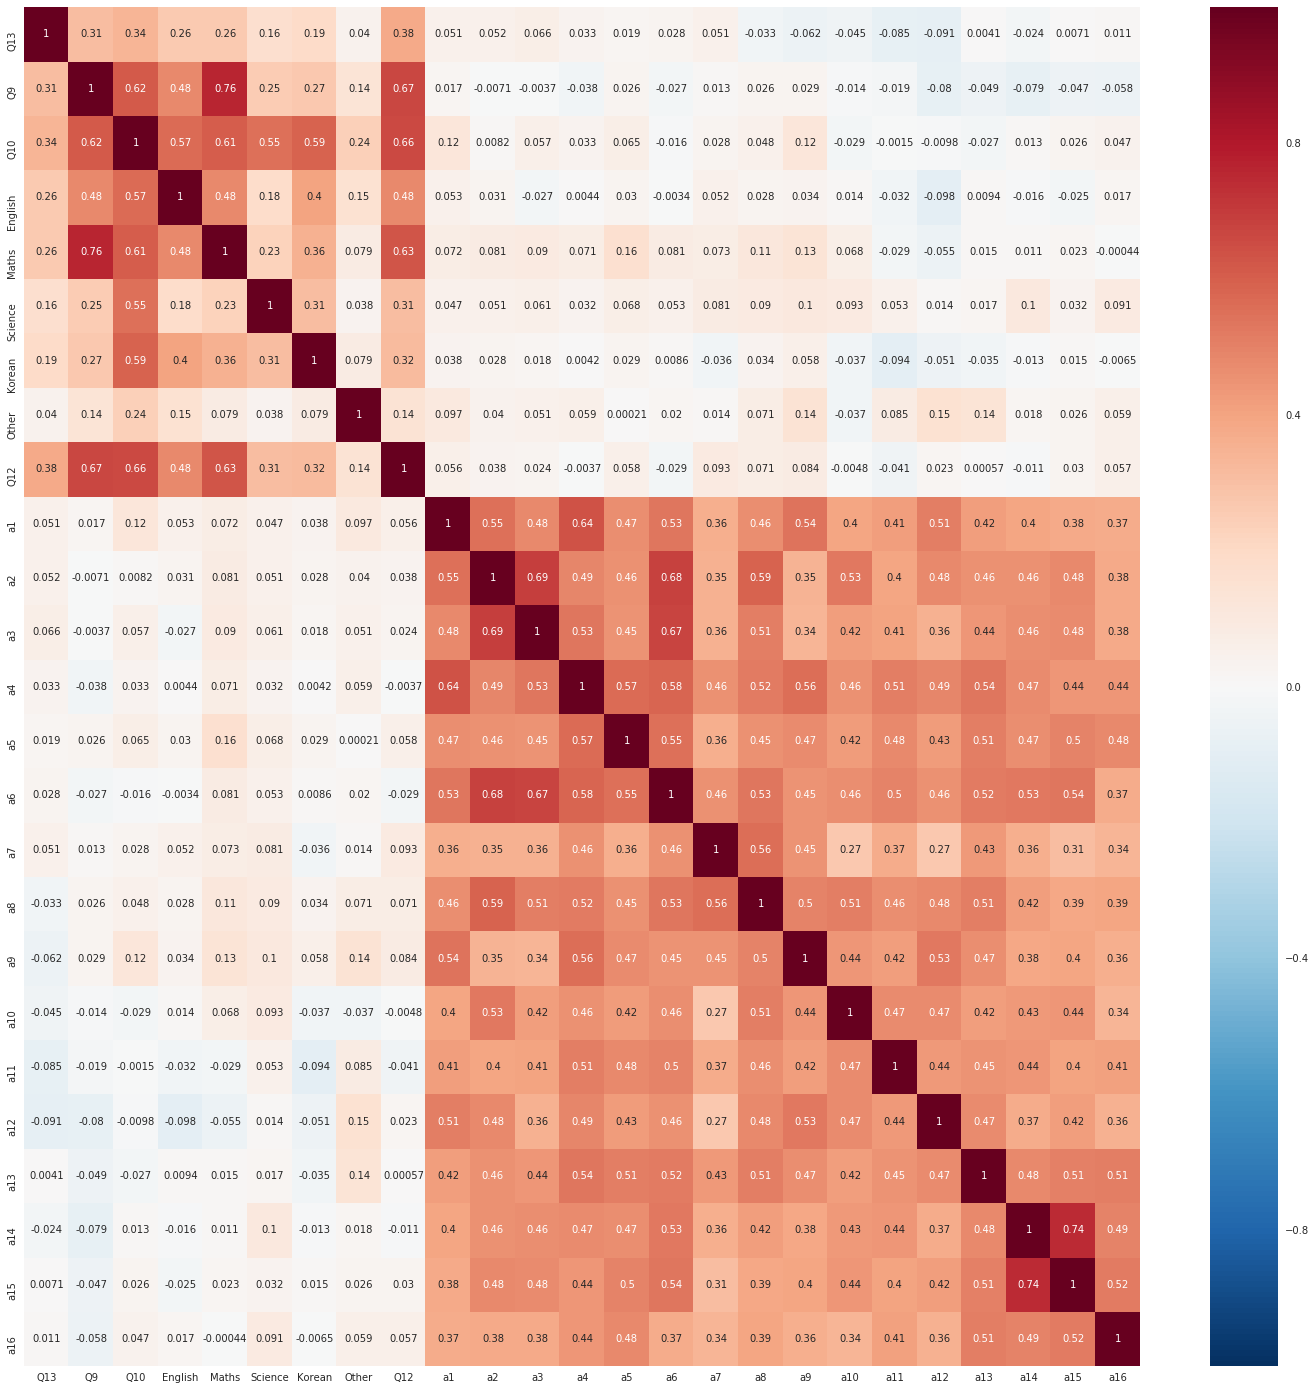

In [50]:
plt.figure(figsize = (25,25))
sns.heatmap(df7_re.corr(), annot=True)

In [51]:
df7_re.keys()

Index(['Q13', 'Q9', 'Q10', 'English', 'Maths', 'Science', 'Korean', 'Other',
       'Q12', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10',
       'a11', 'a12', 'a13', 'a14', 'a15', 'a16'],
      dtype='object')

# x = [Q13, Q9, Q10, Q12, English, Maths, Science, Korean, Other] y = a1

In [52]:
model_a1 = sm.OLS.from_formula("a1 ~ "
                   "scale(Q13) + scale(Q9) + scale(Q10)+ scale(Q12) + scale(English) +scale(Maths) + scale(Science)\
                   + scale(Korean)+ scale(Other)", data=df7_re)

In [53]:
result_a1 = model_a1.fit()
print (result_a1.summary())

                            OLS Regression Results                            
Dep. Variable:                     a1   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.8294
Date:                Tue, 07 Nov 2017   Prob (F-statistic):              0.590
Time:                        11:45:27   Log-Likelihood:                -336.40
No. Observations:                 234   AIC:                             692.8
Df Residuals:                     224   BIC:                             727.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.2265      0.068     47.

# x = [Q13, Q9, Q10, Q12, English, Maths, Science, Korean, Other] y = a2

In [54]:
model_a2 = sm.OLS.from_formula("a2 ~ "
                   "scale(Q13) + scale(Q9) + scale(Q10)+ scale(Q12) + scale(English) +scale(Maths) + scale(Science)\
                   + scale(Korean)+ scale(Other)", data=df7_re)

In [55]:
result_a2 = model_a2.fit()
print (result_a2.summary())

                            OLS Regression Results                            
Dep. Variable:                     a2   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.8270
Date:                Tue, 07 Nov 2017   Prob (F-statistic):              0.592
Time:                        11:45:27   Log-Likelihood:                -317.77
No. Observations:                 234   AIC:                             655.5
Df Residuals:                     224   BIC:                             690.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.9359      0.063     62.

# x = [Q13, Q9, Q10, Q12, English, Maths, Science, Korean, Other] y = a3

In [56]:
model_a3 = sm.OLS.from_formula("a3 ~ "
                   "scale(Q13) + scale(Q9) + scale(Q10)+ scale(Q12) + scale(English) +scale(Maths) + scale(Science)\
                   + scale(Korean)+ scale(Other)", data=df7_re)

result_a3 = model_a3.fit()
print (result_a3.summary())

                            OLS Regression Results                            
Dep. Variable:                     a3   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9698
Date:                Tue, 07 Nov 2017   Prob (F-statistic):              0.466
Time:                        11:45:27   Log-Likelihood:                -328.48
No. Observations:                 234   AIC:                             677.0
Df Residuals:                     224   BIC:                             711.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.6410      0.066     55.

# x = [Q13, Q9, Q10, Q12, English, Maths, Science, Korean, Other] y = a4

In [57]:
model_a4 = sm.OLS.from_formula("a4 ~ "
                   "scale(Q13) + scale(Q9) + scale(Q10)+ scale(Q12) + scale(English) +scale(Maths) + scale(Science)\
                   + scale(Korean)+ scale(Other)", data=df7_re)

result_a4 = model_a4.fit()
print (result_a4.summary())

                            OLS Regression Results                            
Dep. Variable:                     a4   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.9181
Date:                Tue, 07 Nov 2017   Prob (F-statistic):              0.510
Time:                        11:45:27   Log-Likelihood:                -351.47
No. Observations:                 234   AIC:                             722.9
Df Residuals:                     224   BIC:                             757.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.0470      0.073     41.

# x = [Q13, Q9, Q10, Q12, English, Maths, Science, Korean, Other] y = a5

In [58]:
model_a5 = sm.OLS.from_formula("a5 ~ "
                   "scale(Q13) + scale(Q9) + scale(Q10)+ scale(Q12) + scale(English) +scale(Maths) + scale(Science)\
                   + scale(Korean)+ scale(Other)", data=df7_re)

result_a5 = model_a5.fit()
print (result_a5.summary())

                            OLS Regression Results                            
Dep. Variable:                     a5   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1.330
Date:                Tue, 07 Nov 2017   Prob (F-statistic):              0.222
Time:                        11:45:27   Log-Likelihood:                -324.07
No. Observations:                 234   AIC:                             668.1
Df Residuals:                     224   BIC:                             702.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.4701      0.065     53.

# x = [Q13, Q9, Q10, Q12, English, Maths, Science, Korean, Other] y = a6

In [59]:
model_a6 = sm.OLS.from_formula("a6 ~ "
                   "scale(Q13) + scale(Q9) + scale(Q10)+ scale(Q12) + scale(English) +scale(Maths) + scale(Science)\
                   + scale(Korean)+ scale(Other)", data=df7_re)

result_a6 = model_a6.fit()
print (result_a6.summary())

                            OLS Regression Results                            
Dep. Variable:                     a6   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.093
Date:                Tue, 07 Nov 2017   Prob (F-statistic):              0.369
Time:                        11:45:27   Log-Likelihood:                -330.65
No. Observations:                 234   AIC:                             681.3
Df Residuals:                     224   BIC:                             715.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.5684      0.066     53.

# x = [Q13, Q9, Q10, Q12, English, Maths, Science, Korean, Other] y = a7

In [60]:
model_a7 = sm.OLS.from_formula("a7 ~ "
                   "scale(Q13) + scale(Q9) + scale(Q10)+ scale(Q12) + scale(English) +scale(Maths) + scale(Science)\
                   + scale(Korean)+ scale(Other)", data=df7_re)

result_a7 = model_a7.fit()
print (result_a7.summary())

                            OLS Regression Results                            
Dep. Variable:                     a7   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.9327
Date:                Tue, 07 Nov 2017   Prob (F-statistic):              0.497
Time:                        11:45:28   Log-Likelihood:                -332.22
No. Observations:                 234   AIC:                             684.4
Df Residuals:                     224   BIC:                             719.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.1709      0.067     47.

# x = [Q13, Q9, Q10, Q12, English, Maths, Science, Korean, Other] y = a8

In [61]:
model_a8 = sm.OLS.from_formula("a8 ~ "
                   "scale(Q13) + scale(Q9) + scale(Q10)+ scale(Q12) + scale(English) +scale(Maths) + scale(Science)\
                   + scale(Korean)+ scale(Other)", data=df7_re)

result_a8 = model_a8.fit()
print (result_a8.summary())

                            OLS Regression Results                            
Dep. Variable:                     a8   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.050
Date:                Tue, 07 Nov 2017   Prob (F-statistic):              0.401
Time:                        11:45:28   Log-Likelihood:                -305.34
No. Observations:                 234   AIC:                             630.7
Df Residuals:                     224   BIC:                             665.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.6368      0.060     61.

# x = [Q13, Q9, Q10, Q12, English, Maths, Science, Korean, Other] y = a9

In [62]:
model_a9 = sm.OLS.from_formula("a9 ~ "
                   "scale(Q13) + scale(Q9) + scale(Q10)+ scale(Q12) + scale(English) +scale(Maths) + scale(Science)\
                   + scale(Korean)+ scale(Other)", data=df7_re)

result_a9 = model_a9.fit()
print (result_a9.summary())

                            OLS Regression Results                            
Dep. Variable:                     a9   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     1.921
Date:                Tue, 07 Nov 2017   Prob (F-statistic):             0.0501
Time:                        11:45:28   Log-Likelihood:                -330.87
No. Observations:                 234   AIC:                             681.7
Df Residuals:                     224   BIC:                             716.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.2650      0.066     49.

# x = [Q13, Q9, Q10, Q12, English, Maths, Science, Korean, Other] y = a10

In [63]:
model_a10 = sm.OLS.from_formula("a10 ~ "
                   "scale(Q13) + scale(Q9) + scale(Q10)+ scale(Q12) + scale(English) +scale(Maths) + scale(Science)\
                   + scale(Korean)+ scale(Other)", data=df7_re)

result_a10 = model_a10.fit()
print (result_a10.summary())

                            OLS Regression Results                            
Dep. Variable:                    a10   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.175
Date:                Tue, 07 Nov 2017   Prob (F-statistic):              0.312
Time:                        11:45:28   Log-Likelihood:                -310.78
No. Observations:                 234   AIC:                             641.6
Df Residuals:                     224   BIC:                             676.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.5256      0.061     57.

# x = [Q13, Q9, Q10, Q12, English, Maths, Science, Korean, Other] y = a11

In [64]:
model_a11 = sm.OLS.from_formula("a11 ~ "
                   "scale(Q13) + scale(Q9) + scale(Q10)+ scale(Q12) + scale(English) +scale(Maths) + scale(Science)\
                   + scale(Korean)+ scale(Other)", data=df7_re)

result_a11 = model_a11.fit()
print (result_a11.summary())

                            OLS Regression Results                            
Dep. Variable:                    a11   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.8683
Date:                Tue, 07 Nov 2017   Prob (F-statistic):              0.554
Time:                        11:45:28   Log-Likelihood:                -313.74
No. Observations:                 234   AIC:                             647.5
Df Residuals:                     224   BIC:                             682.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.4231      0.062     55.

# x = [Q13, Q9, Q10, Q12, English, Maths, Science, Korean, Other] y = a12

In [65]:
model_a12 = sm.OLS.from_formula("a12 ~ "
                   "scale(Q13) + scale(Q9) + scale(Q10)+ scale(Q12) + scale(English) +scale(Maths) + scale(Science)\
                   + scale(Korean)+ scale(Other)", data=df7_re)

result_a12 = model_a12.fit()
print (result_a12.summary())

                            OLS Regression Results                            
Dep. Variable:                    a12   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     1.692
Date:                Tue, 07 Nov 2017   Prob (F-statistic):             0.0921
Time:                        11:45:28   Log-Likelihood:                -307.71
No. Observations:                 234   AIC:                             635.4
Df Residuals:                     224   BIC:                             670.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.7735      0.060     62.

# x = [Q13, Q9, Q10, Q12, English, Maths, Science, Korean, Other] y = a13

In [66]:
model_a13 = sm.OLS.from_formula("a13 ~ "
                   "scale(Q13) + scale(Q9) + scale(Q10)+ scale(Q12) + scale(English) +scale(Maths) + scale(Science)\
                   + scale(Korean)+ scale(Other)", data=df7_re)

result_a13 = model_a13.fit()
print (result_a13.summary())

                            OLS Regression Results                            
Dep. Variable:                    a13   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.089
Date:                Tue, 07 Nov 2017   Prob (F-statistic):              0.372
Time:                        11:45:28   Log-Likelihood:                -326.01
No. Observations:                 234   AIC:                             672.0
Df Residuals:                     224   BIC:                             706.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.5470      0.065     54.

# x = [Q13, Q9, Q10, Q12, English, Maths, Science, Korean, Other] y = a14

In [67]:
model_a14 = sm.OLS.from_formula("a14 ~ "
                   "scale(Q13) + scale(Q9) + scale(Q10)+ scale(Q12) + scale(English) +scale(Maths) + scale(Science)\
                   + scale(Korean)+ scale(Other)", data=df7_re)

result_a14 = model_a14.fit()
print (result_a14.summary())

                            OLS Regression Results                            
Dep. Variable:                    a14   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.9449
Date:                Tue, 07 Nov 2017   Prob (F-statistic):              0.487
Time:                        11:45:28   Log-Likelihood:                -327.71
No. Observations:                 234   AIC:                             675.4
Df Residuals:                     224   BIC:                             710.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.4573      0.066     52.

# x = [Q13, Q9, Q10, Q12, English, Maths, Science, Korean, Other] y = a15

In [68]:
model_a15 = sm.OLS.from_formula("a15 ~ "
                   "scale(Q13) + scale(Q9) + scale(Q10)+ scale(Q12) + scale(English) +scale(Maths) + scale(Science)\
                   + scale(Korean)+ scale(Other)", data=df7_re)

result_a15 = model_a15.fit()
print (result_a15.summary())

                            OLS Regression Results                            
Dep. Variable:                    a15   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                    0.4567
Date:                Tue, 07 Nov 2017   Prob (F-statistic):              0.902
Time:                        11:45:28   Log-Likelihood:                -320.30
No. Observations:                 234   AIC:                             660.6
Df Residuals:                     224   BIC:                             695.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.6453      0.064     57.

# x = [Q13, Q9, Q10, Q12, English, Maths, Science, Korean, Other] y = a16

In [69]:
model_a16 = sm.OLS.from_formula("a16 ~ "
                   "scale(Q13) + scale(Q9) + scale(Q10)+ scale(Q12) + scale(English) +scale(Maths) + scale(Science)\
                   + scale(Korean)+ scale(Other)", data=df7_re)

result_a16 = model_a16.fit()
print (result_a16.summary())

                            OLS Regression Results                            
Dep. Variable:                    a16   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.9101
Date:                Tue, 07 Nov 2017   Prob (F-statistic):              0.517
Time:                        11:45:29   Log-Likelihood:                -360.63
No. Observations:                 234   AIC:                             741.3
Df Residuals:                     224   BIC:                             775.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.1880      0.076     42.